# Workshop 1 ― Intro to Data Preprocessing

During this workshop, we will be looking at the relationship between the height and weight of various players, as well as try to predict their overall rating based on various features.

##1. Importing Libraries

In [0]:
from sklearn.linear_model import LinearRegression # Model
from sklearn.metrics import r2_score # Goodness of fit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
# data transformation, data augmentation

import matplotlib.pyplot as plt # plotting
import pandas as pd # data manipulation and analysis
import numpy as np # numerical computation

## 2. Exploring the raw data

Let's first look at the raw file.

Pandas will automatically read the header for you.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Symmetries/f2019workshop1/master/FullData.csv')

We can then get a preview of the data by using the `head()` function

In [0]:
df.head(n = 10)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94.0,185 cm,80 kg,Right,02/05/1985,32.0,LW/ST,High / Low,4.0,5.0,93.0,92.0,22.0,23.0,31.0,63.0,96.0,94.0,29.0,85.0,86.0,84.0,83.0,77.0,91.0,92.0,92.0,80.0,63.0,90.0,95.0,85.0,92.0,93.0,90.0,81.0,76.0,85.0,88.0,14.0,7.0,15.0,11.0,11.0
1,Lionel Messi,argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93.0,170 cm,72 kg,Left,06/24/1987,29.0,RW,Medium / Medium,4.0,4.0,95.0,97.0,13.0,26.0,28.0,48.0,95.0,93.0,22.0,90.0,94.0,77.0,88.0,87.0,92.0,87.0,74.0,59.0,95.0,90.0,68.0,71.0,85.0,95.0,88.0,89.0,90.0,74.0,85.0,14.0,6.0,15.0,11.0,8.0
2,Neymar,BRAZIL,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92.0,174 cm,68 kg,Right,02/05/1992,25.0,LW,High / Medium,5.0,5.0,95.0,96.0,21.0,33.0,24.0,56.0,88.0,90.0,36.0,80.0,80.0,75.0,81.0,75.0,93.0,90.0,79.0,49.0,82.0,96.0,61.0,62.0,78.0,89.0,77.0,79.0,84.0,81.0,83.0,15.0,9.0,15.0,9.0,11.0
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92.0,182 cm,85 kg,Right,01/24/1987,30.0,ST,High / Medium,4.0,4.0,91.0,86.0,30.0,38.0,45.0,78.0,93.0,92.0,41.0,84.0,83.0,77.0,83.0,64.0,88.0,77.0,89.0,76.0,60.0,86.0,69.0,77.0,87.0,94.0,86.0,86.0,84.0,85.0,88.0,33.0,27.0,31.0,25.0,37.0
4,Manuel Neuer,germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92.0,193 cm,92 kg,Right,03/27/1986,31.0,GK,Medium / Medium,4.0,1.0,48.0,30.0,10.0,11.0,10.0,29.0,85.0,12.0,30.0,70.0,70.0,15.0,55.0,59.0,58.0,61.0,44.0,83.0,35.0,52.0,78.0,25.0,25.0,13.0,16.0,14.0,11.0,47.0,11.0,91.0,89.0,95.0,90.0,89.0
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90.0,193 cm,82 kg,Right,11/07/1990,26.0,GK,Medium / Medium,3.0,1.0,31.0,13.0,13.0,13.0,21.0,38.0,88.0,12.0,30.0,68.0,60.0,17.0,31.0,32.0,56.0,56.0,25.0,64.0,43.0,57.0,67.0,21.0,31.0,13.0,12.0,21.0,19.0,40.0,13.0,86.0,88.0,87.0,85.0,90.0
6,Robert Lewandowski,poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90.0,185 cm,79 kg,Right,08/21/1988,28.0,ST,High / Medium,4.0,3.0,87.0,85.0,25.0,19.0,42.0,80.0,88.0,89.0,39.0,78.0,87.0,62.0,83.0,65.0,79.0,82.0,79.0,84.0,79.0,78.0,84.0,85.0,86.0,91.0,82.0,77.0,76.0,81.0,86.0,8.0,15.0,12.0,6.0,10.0
7,Gareth Bale,wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90.0,183 cm,74 kg,Left,07/16/1989,27.0,RW,High / Medium,3.0,4.0,88.0,89.0,51.0,52.0,55.0,65.0,87.0,86.0,59.0,79.0,85.0,87.0,86.0,80.0,93.0,95.0,78.0,80.0,65.0,77.0,85.0,86.0,91.0,87.0,90.0,86.0,85.0,76.0,76.0,5.0,15.0,11.0,15.0,6.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Thibaut Courtois,Belgium,GK,1.0,Chelsea,GK,13.0,07/26/2011,2019.0,89.0,199 cm,91 kg,Left,05/11/1992,24.0,GK,Medium / Medium,3.0,1.0,23.0,13.0,11.0,16.0,18.0,23.0,81.0,13.0,15.0,44.0,52.0,14.0,32.0,31.0,46.0,52.0,38.0,70.0,45.0,61.0,68.0,13.0,36.0,14.0,17.0,19.0,11.0,27.0,12.0,86.0,84.0,69.0,91.0,89.0


We observe that in row 8, the data is not available. This can happen and there are many ways to deal with it.

- If the entire row is empty, we will usually get rid of the row entirely.


Sometimes, if only a few values are missing we can:
1. replace the value with the mean of this feature. For example, use the average of all player's weight
2. replace the value with the mean, with respect to another feature. For example, we can replace the average height of a player by the average height of players of the same country
3. remove the entire row (we should try to limit this if your dataset is quite small)

In [0]:
# remove the rows with non available data in place
df.dropna(inplace = True, how = 'all')

Using pandas, you can look at the shape of your data (number of columns and rows)

In this case, our data has 53 features (columns) and 15838 data points (rows)

In [0]:
# View the shape of the data
df.shape

(15838, 53)

### 2.1 Some stats about the data

You can use the `describe` function to get a good overview of you data.

The default `describe()` only shows numerical values

```
Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
```

In [0]:
df.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,993.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.00000,15829.000000,15829.000000,15829.000000
mean,12.101712,21.310759,2018.908649,66.189715,25.479373,2.931455,2.302609,57.962663,54.787605,44.261735,45.581275,47.453598,55.955904,61.797713,49.609072,46.811548,52.719565,55.840230,49.781035,58.118833,52.400467,65.291048,65.495230,63.510329,65.078211,64.042201,63.215427,64.963043,52.442100,55.568198,45.127930,47.381641,47.174932,43.346642,49.160023,43.263125,16.657780,16.86291,16.512098,16.585634,16.951797
std,6.885785,19.243240,1.703990,7.072994,4.672335,0.654905,0.745490,16.849564,18.922791,21.592307,21.547188,21.872666,17.435551,9.287194,19.429543,20.510457,14.575274,13.480573,18.481320,14.994973,15.630669,14.464208,14.148891,15.501733,12.527188,13.707700,14.608256,11.421252,17.498161,17.645821,19.392583,19.237485,18.475706,17.702297,15.897296,17.743966,17.174224,17.84864,16.646598,17.001355,18.091151
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,2.000000,29.000000,2.000000,3.000000,10.000000,5.000000,6.000000,10.000000,9.000000,11.000000,11.000000,10.000000,20.000000,11.000000,11.000000,15.000000,4.000000,3.000000,2.000000,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,23.000000,26.000000,44.000000,55.000000,37.000000,26.000000,43.000000,47.000000,38.000000,52.000000,42.000000,57.000000,58.000000,57.000000,57.000000,56.000000,55.000000,58.000000,45.000000,45.000000,29.000000,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.00000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,62.000000,60.000000,48.000000,52.000000,54.000000,59.000000,62.000000,54.000000,52.000000,54.000000,57.000000,54.000000,62.000000,56.000000,68.000000,68.000000,66.000000,66.000000,65.000000,65.000000,65.000000,56.000000,59.000000,48.000000,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.00000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,64.000000,66.000000,70.000000,68.000000,64.000000,64.000000,64.000000,66.000000,64.000000,68.000000,64.000000,75.000000,75.000000,74.000000,74.000000,74.000000,74.000000,73.000000,65.000000,69.000000,61.000000,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.00000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,95.000000,92.000000,96.000000,96.000000,94.000000,93.000000,94.000000,94.000000,91.000000,92.000000,93.000000,96.000000,96.000000,95.000000,98.000000,97.000000,96.000000,95.000000,94.000000,92.000000,95.000000,91.000000,92.000000,93.000000,96.000000,91.000000,91.000000,89.00000,95.000000,91.000000,90.000000


Pandas also offers various functions to get information about your data, such as histograms

```
A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.
```

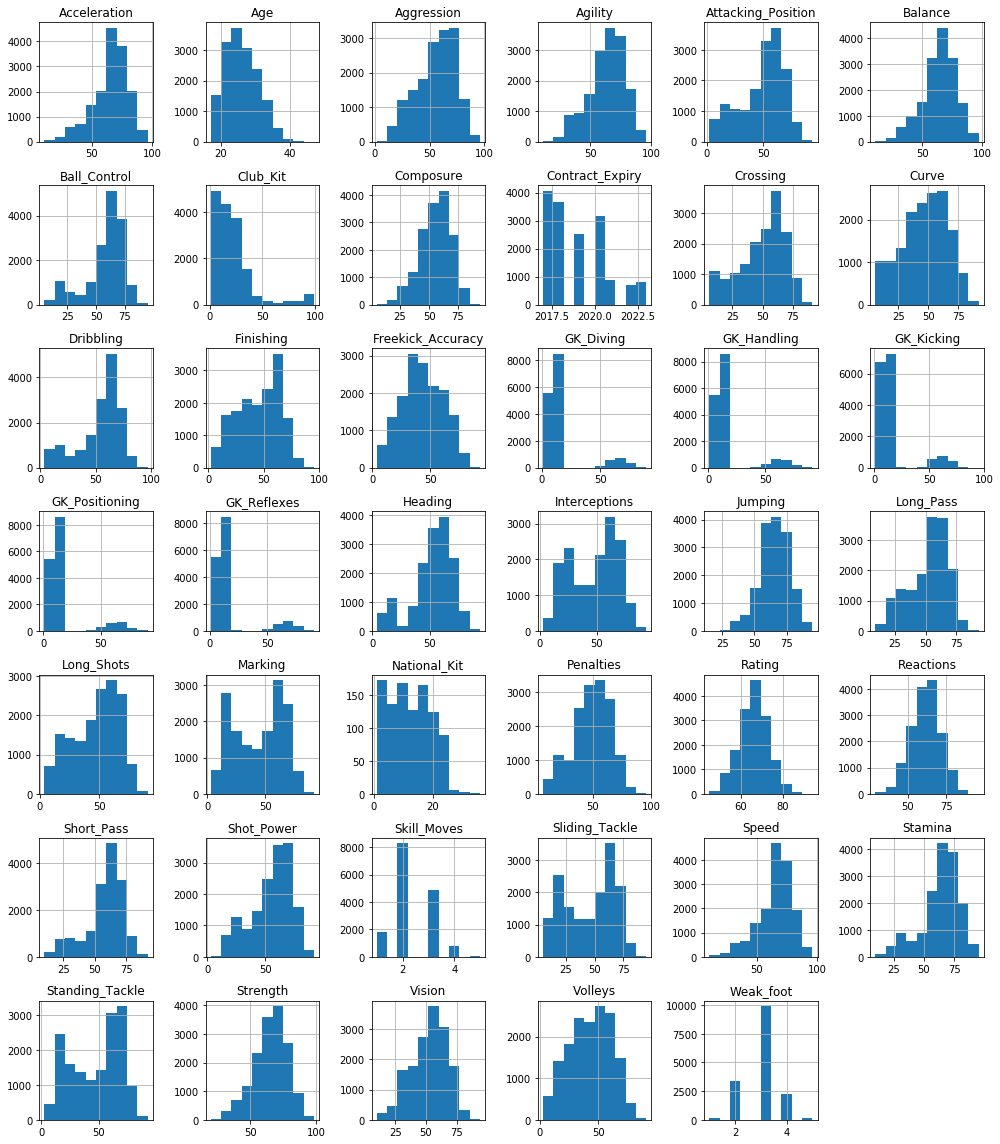

In [0]:
df.hist(figsize = (14,16))
plt.tight_layout()

### 2.2 Looking at specific columns

We can also view the various types of features(columns) in our data.

The data can be messy, so using this function can help you check which columns are numerical or strings. 

In our case, we notice that `Height` and `Weight` are oddly not numerical, but objects.

In [0]:
df.dtypes

Name                   object
Nationality            object
National_Position      object
National_Kit          float64
Club                   object
Club_Position          object
Club_Kit              float64
Club_Joining           object
Contract_Expiry       float64
Rating                float64
Height                 object
Weight                 object
Preffered_Foot         object
Birth_Date             object
Age                   float64
Preffered_Position     object
Work_Rate              object
Weak_foot             float64
Skill_Moves           float64
Ball_Control          float64
Dribbling             float64
Marking               float64
Sliding_Tackle        float64
Standing_Tackle       float64
Aggression            float64
Reactions             float64
Attacking_Position    float64
Interceptions         float64
Vision                float64
Composure             float64
Crossing              float64
Short_Pass            float64
Long_Pass             float64
Accelerati

To get a better idea of the problem, we can look at some of the datapoints of these columns (we used a random sampling of the data)

In [0]:
df[['Weight', 'Height']].sample(n = 10)

,Weight,Height
15236,75 kg,184 cm
8876,80 kg,188 cm
704,83 kg,185 cm
8814,65 kg,179 cm
11166,68 kg,180 cm
2544,68 kg,175 cm
15008,79 kg,187 cm
17513,78 kg,183 cm
4574,79 kg,194 cm
3978,75 kg,186 cm


We now know that the reason they are not classified as numeric values is because it includes the unit.

We can perform some transformations to get rid of the unit and convert the column to a numerical column.

In [0]:
df['Height'] = pd.to_numeric(df['Height'].str[:-3])
df['Weight'] = pd.to_numeric(df['Weight'].str[:-3])


ValueError: ignored

### 2.3 Dropping rows

The above cell should fail, as some heights or weight are still unavailable (NaN).

We can use pandas to drop the rows that have unavailable heights or weights

In [0]:
# Drop rows with heights or weights that are unavailable
df.dropna(subset = ['Weight', 'Height'], inplace = True)

In [0]:
# Convert the height and weight columns to numeric columns if they are of type object
if df['Height'].dtype == object:
  df['Height'] = pd.to_numeric(df['Height'].str[:-3])

if df['Weight'].dtype == object:
  df['Weight'] = pd.to_numeric(df['Weight'].str[:-3])

  
df[['Weight', 'Height']].sample(n = 10)

,Weight,Height
4652,73.0,184.0
1494,77.0,179.0
11830,75.0,181.0
7558,79.0,183.0
6761,63.0,174.0
5123,73.0,180.0
1405,79.0,184.0
17526,72.0,198.0
14705,66.0,175.0
17290,72.0,185.0


We can now view the distribution of the data for the height and weight

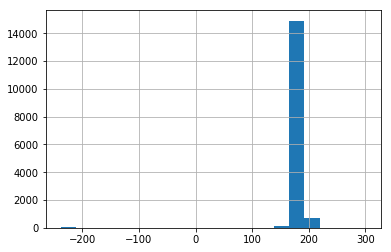

In [0]:
df['Height'].hist(bins = 20)

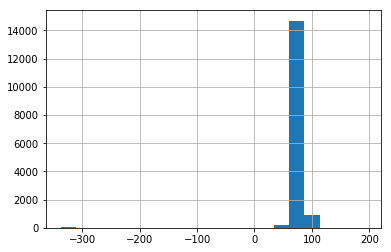

In [0]:
df['Weight'].hist(bins = 20)

We observe that some of the data does not make sense.

1. a player cannot have a negative weight
2. a player cannot have a negative height
3. some players are way too light/heavy
4. some players are way too tall/short

We can keep the rows with players over 50kg and under 160kg and keep the players over 100 cm and under 220 cm

In [0]:
df = df[(df['Weight'] > 50) & (df['Weight'] < 160)]
df = df[(df['Height'] > 100) & (df['Height'] < 220)]

df[['Weight', 'Height']].sample(n = 10)

,Weight,Height
4533,83.0,182.0
16086,68.0,179.0
11685,75.0,185.0
1948,85.0,186.0
8057,77.0,178.0
14345,82.0,182.0
752,72.0,178.0
1776,76.0,185.0
16338,79.0,185.0
515,70.0,176.0


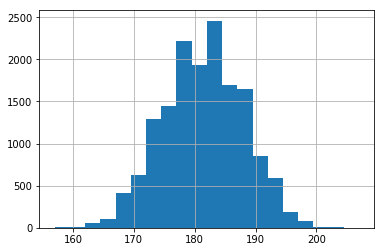

In [0]:
df['Height'].hist(bins = 20)

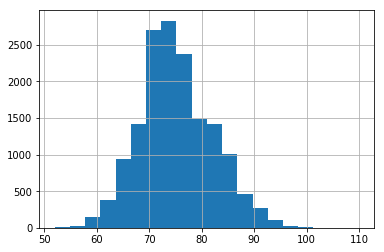

In [0]:
df['Weight'].hist(bins=20)

### 2.4  Looking at correlated features

Now, we can look at weights and heights together.


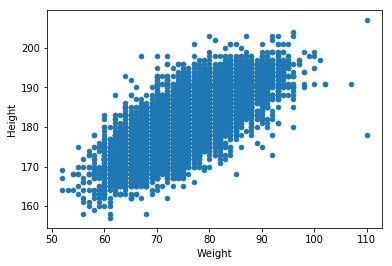

In [0]:
df.plot.scatter(x='Weight', y='Height')

Let's see how correlated the weights and the heights are.

In [0]:
X = df['Weight'].to_numpy().reshape(-1, 1)
y = df['Height'].to_numpy()
model = LinearRegression()
model.fit(X, y)
print(r2_score(y, model.predict(X)))

0.5747410554924008


There is some correlation but it is weak. Let's look at true vs predictions.

Text(0, 0.5, 'True Height')

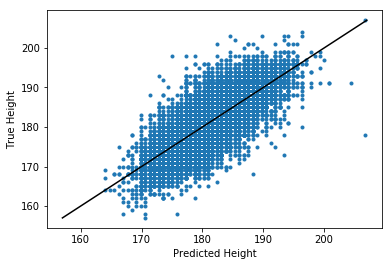

In [0]:
plt.figure()
plt.plot(model.predict(X), y, '.')
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)], 'k')
plt.xlabel('Predicted Height')
plt.ylabel('True Height')


Let's try to predict the rating given the weight and the height

In [0]:
X = df[['Weight', 'Height', 'Age', 'Speed', 'Dribbling']].to_numpy()
y = df['Rating'].to_numpy()

model = LinearRegression()
model.fit(X, y)

print(r2_score(y, model.predict(X)))

0.40399410203818065


As we can see, our model fails to predict the rating given only the weight and the height.

Text(0, 0.5, 'True rating')

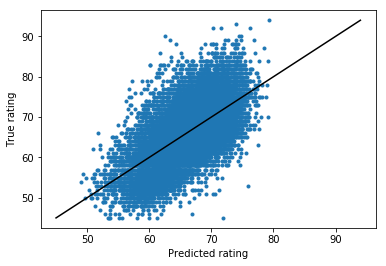

In [0]:
plt.plot(model.predict(X), y, ".")
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)], 'k')
plt.xlabel('Predicted rating')
plt.ylabel('True rating')

Not very good... now let's see if some preprocessing can change this

## 3. Data Transformations



### 3.1 Min-Max Normalization

Let's use the sklearn `MinMaxScaler`.

In [0]:
scaler_X = MinMaxScaler(feature_range=(-1, 1))
X = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(-1, 1))
y = scaler_y.fit_transform(y.reshape((-1, 1))).reshape((-1,))

Let's create a model on the scaled data

In [0]:
model = LinearRegression()
model.fit(X, y)
print(r2_score(y, model.predict(X)))

0.40399410203818065


Text(0, 0.5, 'True rating')

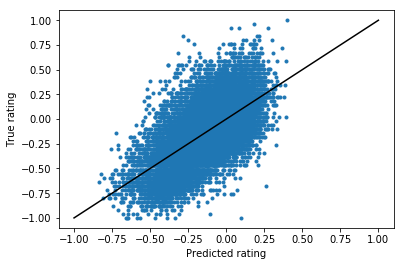

In [0]:
plt.plot(model.predict(X), y , ".")
plt.plot([-1, 1], [-1, 1], 'k')
plt.xlabel('Predicted rating')
plt.ylabel('True rating')

We get the same score as before!

This is because linear regression is invariant to scaling...

However, now we can add non-linearity to the model since the values have been scaled!

### 3.2 Adding Features

Let's add degree 2 features to our model

In [0]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
print(X_poly.shape)

model = LinearRegression()
model.fit(X_poly, y)

print(r2_score(y, model.predict(X_poly)))

(15636, 21)
0.5699252508606591


Text(0, 0.5, 'True rating')

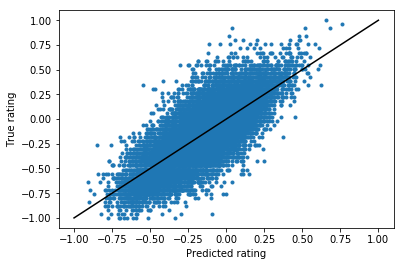

In [0]:
plt.plot(model.predict(X_poly), y , ".")
plt.plot([-1, 1], [-1, 1], 'k')
plt.xlabel('Predicted rating')
plt.ylabel('True rating')